In [ ]:
# PART B - CLASSIFICATION MODELLING FOR BUSINESS DECISION MAKING
# Task1 - Data Preprocessing

In [60]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
#from sklearn.metrics import roc_curve, auc, roc_auc_score
np.random.seed(0)

In [62]:
#Loading the dataset
df=pd.read_csv("C:\\Users\\Aynur\\Downloads\\archive (10)\\alzheimers_disease_data.csv")
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [64]:
#Checking duplicated values
duplicated=df.duplicated().sum()
duplicated

0

In [66]:
#Checking the missing values
df.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [68]:
#Delete the unneccessary column 'DoctorInCharge'
df=df.drop('DoctorInCharge',axis=1)
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,5.173891,0,0,3.785399,0,0,0,0,1,1


In [70]:
df['Diagnosis'].unique()

array([0, 1], dtype=int64)

In [ ]:
# b: Standardise the data

In [72]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)
df_scaled

array([[-1.73124502, -0.21236841, -1.01264391, ...,  2.30261868,
        -0.65704809, -0.73970009],
       [-1.72963306,  1.56775727, -1.01264391, ..., -0.43428815,
         1.52195861, -0.73970009],
       [-1.7280211 , -0.21236841, -1.01264391, ...,  2.30261868,
        -0.65704809, -0.73970009],
       ...,
       [ 1.7280211 ,  0.23266301, -1.01264391, ..., -0.43428815,
        -0.65704809,  1.35189925],
       [ 1.72963306,  0.34392086,  0.98751396, ..., -0.43428815,
         1.52195861,  1.35189925],
       [ 1.73124502, -0.32362627, -1.01264391, ..., -0.43428815,
         1.52195861, -0.73970009]])

In [ ]:
# c: One-hot encoding for categorical columns

In [74]:

encoded_df=pd.get_dummies(df,columns=['Ethnicity'],drop_first=True)
#Convert boolean columns to integers
for column in encoded_df.select_dtypes(include=['bool']).columns:
  encoded_df[column]=encoded_df[column].astype(int)
encoded_df.head()

,PatientID,Age,Gender,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,Ethnicity_1,Ethnicity_2,Ethnicity_3
0,4751,73,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,1.725883,0,0,0,1,0,0,0,0,0
1,4752,89,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,2.592424,0,0,0,0,1,0,0,0,0
2,4753,73,0,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,7.119548,0,1,0,1,0,0,0,0,1
3,4754,74,1,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,6.481226,0,0,0,0,0,0,0,0,0
4,4755,89,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,0.014691,0,0,1,1,0,0,0,0,0


In [76]:
encoded_df.shape

(2149, 36)

In [ ]:
#d: Split the dataset into training and testing sets

In [80]:
# Features (all columns except 'Diagnosis')
X=df.drop('Diagnosis',axis=1)
# Target variable 'Diagnosis'
y=df['Diagnosis']
from sklearn.model_selection import train_test_split

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardise the features
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [82]:
#Output the shapes of the split datasets
print(f"X_train Shape: {X_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (1719, 33)
X_test Shape: (430, 33)
y_train Shape: (1719,)
y_test Shape: (430,)


In [ ]:
# Task 2 - Model Building with Hyperparameter tuning
#a: Select an appropriate classification algorithm to predict the target categorical variable. Justify the choice.

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Training the logistic regression model
# Setting max_iter to ensure convergence
model=LogisticRegression(max_iter=1000)
model.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000)

In [86]:
# Making prediction
y_pred = model.predict(X_test_scaled)
#Evaluate the model
print(f"\nModel Evaluation - Logistic Regression")
print("Accuracy: ",accuracy_score(y_test, y_pred))
#print("\nConfusion Report:")
#print(confusion_matrix(y_test, y_pred))
print("Classification Report")
print(classification_report(y_test, y_pred))


Model Evaluation - Logistic Regression
Accuracy:  0.8255813953488372
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       277
           1       0.78      0.71      0.74       153

    accuracy                           0.83       430
   macro avg       0.81      0.80      0.81       430
weighted avg       0.82      0.83      0.82       430



In [88]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
# Training the random forest classifier
random_model=RandomForestClassifier(n_estimators=100, random_state=42)
random_model.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=42)

In [90]:
# Making prediction
y_pred=random_model.predict(X_test_scaled)

In [94]:
# Evaluate the model
print(f"\nModel Evaluation - Random Forest")
print("Accuracy: ", accuracy_score(y_test, y_pred))
#print("\nConfusion Matrix:")
#print(confusion_matrix(y_test, y_pred))
print("Classification Report")
print(classification_report(y_test, y_pred))


Model Evaluation - Random Forest
Accuracy:  0.9279069767441861
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       277
           1       0.96      0.83      0.89       153

    accuracy                           0.93       430
   macro avg       0.94      0.91      0.92       430
weighted avg       0.93      0.93      0.93       430



In [98]:
# Support Vector Machine
from sklearn.svm import SVC
#Training the model
svm=SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled,y_train)

SVC(kernel='linear', random_state=42)

In [100]:
# Making prediction
y_pred=svm.predict(X_test_scaled)

In [102]:
# : Evaluating the model
print(f"\nModel Evaluation - SVM")
print("Accuracy: ", accuracy_score(y_test, y_pred))
#print("\nConfusion Matrix:")
#print(confusion_matrix(y_test, y_pred))  # Confusion matrix to show the classification performance
print(nClassification Report:")
print(classification_report(y_test, y_pred))

SyntaxError: unterminated string literal (detected at line 6) (3642675862.py, line 6)

In [ ]:
# b: Implement hyperparameter tuning by conducting a grid search or random search to optimoze model parameters.

In [104]:
# For logistic regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],       # Regularization type
    'solver': ['liblinear']}       # Solver compatible with l1/l2 penalty

#Set up the Logistic Regression model
logreg = LogisticRegression()

# Perform Grid Search
grid_search = GridSearchCV(logreg, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best model
print("Best Hyperparameters:", grid_search.best_params_)
best_logreg = grid_search.best_estimator_

# Evaluate the optimized model
y_pred = best_logreg.predict(X_test_scaled)
print("Optimized Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Optimized Logistic Regression Accuracy: 0.827906976744186


In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10]   # Minimum samples required to split a node
}

In [144]:
# Set up the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, y_train)  # Correct usage

# Get the best parameters and the best model
print("Best Hyperparameters:", grid_search_rf.best_params_)
best_rf = grid_search_rf.best_estimator_

# Step 6: Evaluate the optimized model
y_pred_rf = best_rf.predict(X_test_scaled)
print("Optimized Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Random Forest Accuracy: 0.9325581395348838


In [ ]:
# For support vector machine
#from sklearn.svm import SVC

# Step 1: Define the parameter grid
#param_grid_svm = {
    #'C': [0.1, 1, 10, 100],         # Regularization strength
    #'kernel': ['linear', 'rbf'],    # Kernel function to use
    #'gamma': ['scale', 'auto'],     # Kernel coefficient for 'rbf' and 'poly'
#}

# Step 2: Set up the SVM model
#svm = SVC()

# Step 3: Perform Grid Search
#grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, n_jobs=-1, scoring='accuracy')
#grid_search_svm.fit(X_train_scaled, y_train)

# Step 4: Get the best parameters and the best model
#print("Best Hyperparameters:", grid_search_svm.best_params_)
#best_svm = grid_search_svm.best_estimator_

# Evaluate the optimized model
#y_pred_svm = best_svm.predict(X_test_scaled)
#print("Optimized SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

In [ ]:
#c. Build the classification model using the training data

In [136]:
#for Logistic 
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()   # Standardize the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()   # Initialize and train the model
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)   # Make predictions

# Evaluate the model
print(f"\nModel Evaluation - Logistic Regression")
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Model Evaluation - Logistic Regression
Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       277
           1       0.78      0.71      0.74       153

    accuracy                           0.83       430
   macro avg       0.81      0.80      0.81       430
weighted avg       0.82      0.83      0.82       430



In [146]:
# for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train_scaled, y_train)  # Train the model

y_pred_rf = rf_model.predict(X_test_scaled)  # Make predictions

rf_model.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)

# Evaluate the model
print(f"\nModel Evaluation - Random Forest")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_rf))


Model Evaluation - Random Forest
Random Forest Accuracy: 0.66
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.96      0.78       277
           1       0.61      0.12      0.21       153

    accuracy                           0.66       430
   macro avg       0.64      0.54      0.50       430
weighted avg       0.65      0.66      0.58       430



C:\Users\Aynur\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [84]:
model_predictions = {
    "Random Forest": y_pred_rf}
print("Models have been successfully trained and predictions made!")

Models have been successfully trained and predictions made!


In [ ]:
# TASK 3:Model Evaluation and Selection

In [ ]:
#a. Calculate and analysise the confusion matrix for the model

In [150]:
# Train Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Train SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)



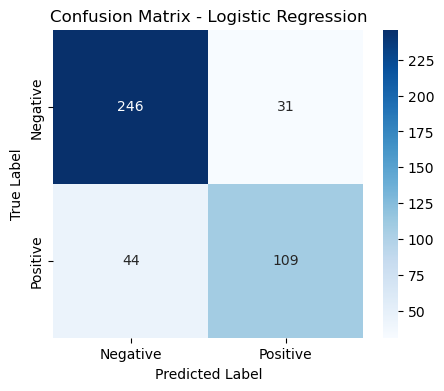

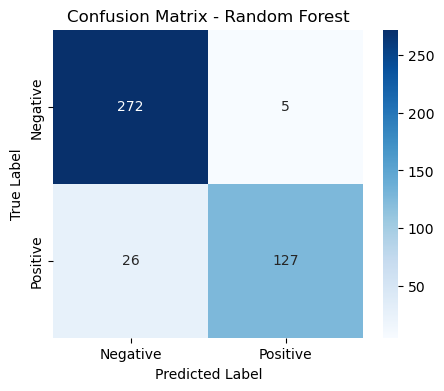

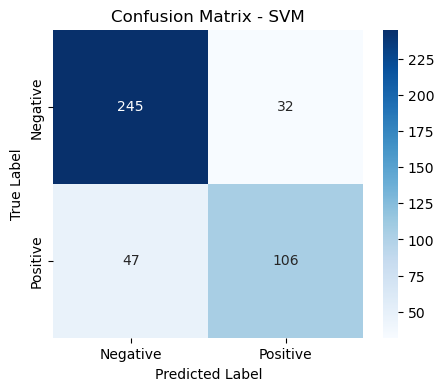

In [148]:
# Function to plot confusion matrices
def plot_confusion_matrix(model_name, y_test, y_pred):
    """Plots the confusion matrix for a given model."""
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=["Negative", "Positive"], 
                yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Store model predictions in a dictionary
model_predictions = {
    "Logistic Regression": y_pred_logistic,
    "Random Forest": y_pred_rf,
    "SVM": y_pred_svm
}

# Plot confusion matrices for all models
for model_name, y_pred in model_predictions.items():
    plot_confusion_matrix(model_name, y_test, y_pred)

In [142]:
# Store result of cross-validation
cv_results = {}

# Function to perform k-Fold Cross-Validation
def k_fold_validation(model, X, y, k=5):
    scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')
    mean_score = scores.mean()
    cv_results[model.__class__.__name__] = mean_score  # Saving results to cv_results
    print(f"{model.__class__.__name__}: Mean Accuracy = {mean_score:.4f}")

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}
# Running k-Fold Cross-Validation for each model
print("\nCross-validation results:")
for name, model in models.items():
    k_fold_validation(model, X_train, y_train)


Cross-validation results:


C:\Users\Aynur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Aynur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression: Mean Accuracy = 0.7190
RandomForestClassifier: Mean Accuracy = 0.9279
SVC: Mean Accuracy = 0.6469
KNeighborsClassifier: Mean Accuracy = 0.5719


In [144]:
#For KNN Model
# Hyperparameter tuning for KNN
param_grid_knn = {'n_neighbors': np.logspace(0, 2, 10, dtype=int), 'weights': ['uniform', 'distance']}
#n_neighbors: The number of nearest neighbors to consider. We use a logarithmic scale from 1 to 100 (10 values) to find the optimal balance between model complexity and generalization.
#weights: The weighting function used in prediction. 'uniform' gives equal weight to all neighbors, while 'distance' gives closer neighbors more influence.

# Initialize GridSearchCV to find the best hyperparameters
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)

grid_knn.fit(X_train, y_train)

# Retrieve the best model with optimal hyperparameters
best_knn = grid_knn.best_estimator_
print(f"Best parameters for KNN: {grid_knn.best_params_}")


Best parameters for KNN: {'n_neighbors': 100, 'weights': 'uniform'}


In [ ]:
#b. Evaluate the performance of the classification model using appropriate model

In [112]:
#c. Implement k-fold cross validation
#Logistic Regression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

# Set up k-fold cross-validation (5 folds)
k = 5
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Standardize the features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Perform cross-validation
log_reg_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=kf, scoring='accuracy')

# Print results
print(f"Logistic Regression - Mean Accuracy: {np.mean(log_reg_scores):.4f} ")

Logistic Regression - Mean Accuracy: 0.8371 


In [116]:
#Random Forest
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Set up k-fold cross-validation (5 folds)
k = 5
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='accuracy')

# Print results
print(f"Random Forest - Mean Accuracy: {np.mean(rf_scores):.4f}")

Random Forest - Mean Accuracy: 0.9261


In [ ]:
# UPDATED CODES

In [118]:
# b)	Implement hyperparameter tuning by conducting a grid search or random search to optimize model parameters
# There are some examples according to different model that you can apply. Let's have a look at code parts below:
#For RandomForest Model
# Similarly, apply np.logspace to define a hyperparameter grid
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf_params = {"n_estimators": [50, 100, 200], 
             "max_depth": np.logspace(1, 3, 10, dtype=int),  
             "min_samples_split": [2, 5, 10]}  
# max_depth uses a logarithmic scale from 10 to 1000

# Grid search for Random Forest
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Retrieve the best model
best_rf = rf_grid_search.best_estimator_
print(f"Best parameters for Random Forest: {rf_grid_search.best_params_}")

Best parameters for Random Forest: {'max_depth': 129, 'min_samples_split': 5, 'n_estimators': 200}


In [124]:
# Selecting the best model based on cross-validation accuracy
best_model_cv = "RandomForestClassifier"

print("\nBest Model Based on Cross-Validation Results:")
print(f"{best_model_cv} with Mean Accuracy: {np.mean(rf_scores):.4f}")

# Justification for choosing Random Forest
justification = (
    "Random Forest is chosen because it has the highest k-Fold accuracy (92.61%), "
    "performs well on high-dimensional data, and is robust to noisy features. "
    "It also reduces overfitting by averaging multiple decision trees, making it "
    "a reliable choice for generalization."
)

print("\nJustification for the Selected Model:")
print(justification)



Best Model Based on Cross-Validation Results:
RandomForestClassifier with Mean Accuracy: 0.9261

Justification for the Selected Model:
Random Forest is chosen because it has the highest k-Fold accuracy (92.61%), performs well on high-dimensional data, and is robust to noisy features. It also reduces overfitting by averaging multiple decision trees, making it a reliable choice for generalization.
